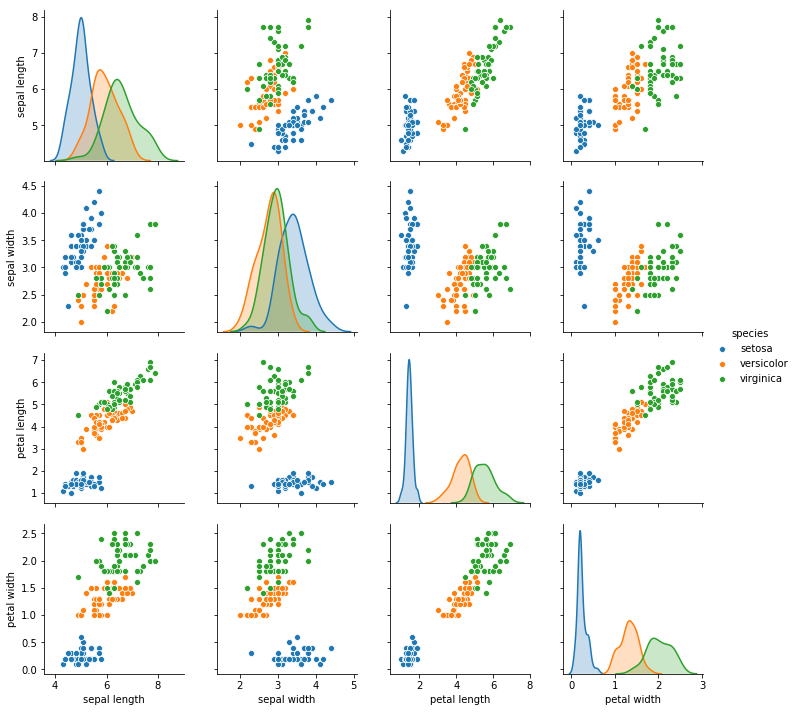

In [1]:
from sklearn.datasets import load_iris
import numpy as np
import seaborn as sns
import pandas as pd
iris = load_iris()
df = pd.DataFrame(data= iris['data'], columns= [x.replace(' (cm)', '') for x in iris['feature_names']]).assign(species=[iris['target_names'][x] for x in iris['target']])
fig1 = sns.pairplot(df, hue='species')
# fig1.savefig("Q1.png", dpi=400)

Above is the code and plot for question 1.

Iris data is converted to dataframe in pandas and plotted using seaborn.pairplot

Setosa is the most distinguishable species among the three, as it has the smallest petal width and petal length. With the same sepal length or sepal width or petal length, versicolor tends to have a smaller petal width and petal length than virginica. But there is no clear boundary between them. Also, it is extremely difficult to separate versicolor and virginica based on sepal width.

Accuracy with default k: 96.67%


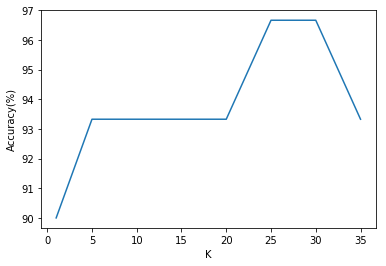

Accuracy with the best k=25: 100.0%
Accuracy with the best k=30: 100.0%


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

dc = KNeighborsClassifier()
dc.fit(x_train, y_train)
print("Accuracy with default k: " + str(round(accuracy_score(y_test, dc.predict(x_test))*100, 2)) + "%")

resAcc = []
for i in [1, 5, 10, 15, 20, 25, 30, 35]:
    c = KNeighborsClassifier(n_neighbors=i)
    c.fit(x_train, y_train)
    resAcc.append(round(accuracy_score(y_val, c.predict(x_val))*100, 2))
    
# fig = plt.figure()
plt.plot([1, 5, 10, 15, 20, 25, 30, 35], resAcc)
plt.xlabel('K')
plt.ylabel('Accuracy(%)')
plt.show()
# fig.savefig('Q2.png', dpi=400)
for i in [[1, 5, 10, 15, 20, 25, 30, 35][x] for x, y in enumerate(resAcc) if y == max(resAcc)]:
    c = KNeighborsClassifier(n_neighbors=i)
    c.fit(x_train, y_train)
    print("Accuracy with the best k=" + str(i) + ': ' + str(round(accuracy_score(y_test, c.predict(x_test)) * 100, 2)) + '%')

Above is the code and plot for question 2

We get train, validation, and test sets by using train_test_split twice

The result for each parameter k is stored in list resAcc. Later, all k that yield the best result are used to train the model and test on the test set

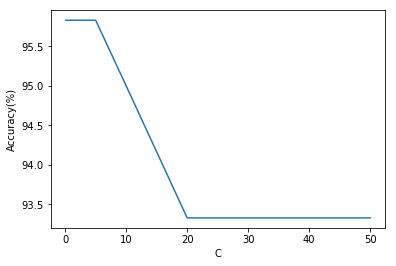

The best parameter C=0.1
Accuracy with C=0.1: 100.0%


In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(random_state=42), {'kernel': ['linear'], 'C': [0.1, 0.5, 1, 2, 5, 10, 20, 50]}, cv=10, scoring='accuracy')
grid.fit(x_train, y_train)

# fig = plt.figure()
plt.plot([0.1, 0.5, 1, 2, 5, 10, 20, 50], [round(x*100,2) for x in grid.cv_results_['mean_test_score']])
plt.xlabel('C')
plt.ylabel('Accuracy(%)')
plt.show()
# fig.savefig('Q3.png', dpi=400)

print('The best parameter C=' + str(grid.best_params_['C']))
print("Accuracy with C=" + str(grid.best_params_['C']) + ': ' + str(round(accuracy_score(y_test, grid.predict(x_test)) * 100, 2)) + '%')

Above is the code and plot for question 3

We use GridSearchCV to automatically test each parameter C and get the best C from grid.best_params_. Therefore, only C=0.1 returns although according to the plot, c = 0.5, 1, 2, 5 yield the same accuracy.

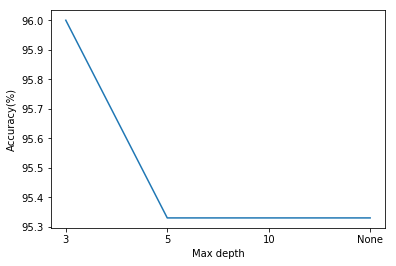

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), {'max_depth': [3, 5, 10, None]}, cv=10, scoring='accuracy')
grid.fit(iris.data, iris.target)

# fig = plt.figure()
plt.plot([3, 5, 10, 'None'], [round(x*100,2) for x in grid.cv_results_['mean_test_score']])
plt.xlabel('Max depth')
plt.ylabel('Accuracy(%)')
plt.show()
# fig.savefig('Q4a.png', dpi=400)

Above is the code and plot for question 4a

max_depth = 3 is the best parameter

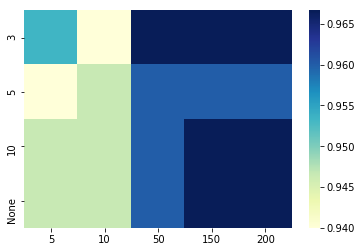

In [5]:
grid = GridSearchCV(RandomForestClassifier(random_state = 42), {'n_estimators': [5, 10, 50, 150, 200], 'max_depth': [3, 5, 10, None]}, cv=10, scoring='accuracy')
grid.fit(iris.data, iris.target)
# print(grid.best_params_)
hm = sns.heatmap(np.array(grid.cv_results_['mean_test_score']).reshape(4,5), cmap="YlGnBu", xticklabels=[5, 10, 50, 150, 200], yticklabels=[3, 5, 10, 'None'])
plt.show()
# hm.get_figure().savefig("Q4b.png", dpi=400)

Above is the code and plot for question 4b

n_estimators = 50, max_depth = 3 are the best parameters

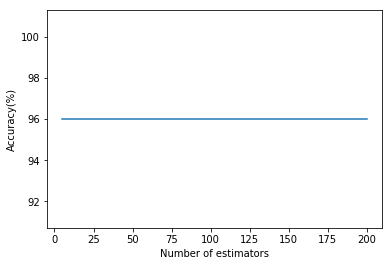

In [6]:
grid = GridSearchCV(GradientBoostingClassifier(random_state=42), {'n_estimators': [5, 10, 50, 150, 200]}, cv=10, scoring='accuracy')
grid.fit(iris.data, iris.target)
# print(grid.best_params_)
# fig = plt.figure()
plt.plot([5, 10, 50, 150, 200], [round(x*100,2) for x in grid.cv_results_['mean_test_score']])
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy(%)')
plt.show()
# fig.savefig('Q4c.png', dpi=400)

Above is the code and plot for question 4c

n_estimators = 50 is the best parameter